In [60]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [61]:
# load the data 

In [62]:
iris=load_iris()


In [63]:
x=iris.data[:, :2]

In [64]:
x.shape

(150, 2)

In [65]:
y=iris.target

In [66]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [67]:
# split the data and train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=10,random_state=42)

In [68]:
# preprocesiing the data / normalize the data
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [69]:
# create a model

model=MLPClassifier(hidden_layer_sizes=(10,),activation='relu',solver='adam',max_iter=1000,random_state=42)
model.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

In [70]:
x_min=x_train[:,0].min()-1
x_max=x_train[:,0].max()+1
y_min=x_train[:,1].min()-1
y_max=x_train[:,1].min()+1

In [71]:
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.01))
predict=model.predict(np.c_[xx.ravel(),yy.ravel()])

In [72]:
predict=predict.reshape(xx.shape)

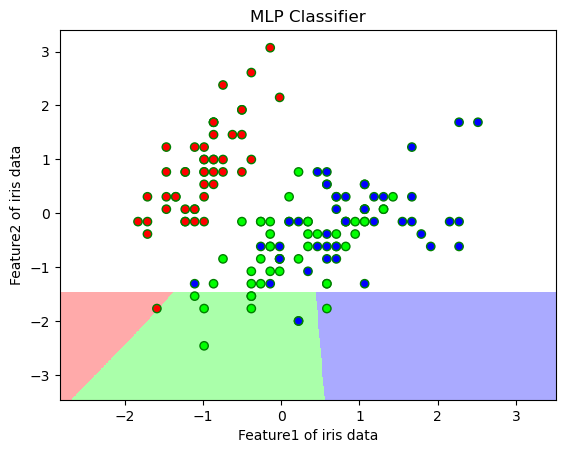

In [84]:
plt.contourf(xx,yy,predict,alpha=1,cmap=ListedColormap(["#FFAAAA","#AAFFAA","#AAAAFF"]))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,edgecolors="g",marker="o",cmap=ListedColormap(["#FF0000","#00FF00","#0000FF"]))
plt.title("MLP Classifier")
plt.xlabel("Feature1 of iris data")
plt.ylabel("Feature2 of iris data")
plt.show()